In [63]:
# https://mg.readthedocs.io/importing-local-python-modules-from-jupyter-notebooks/index.html
import os
import sys
sys.path.insert(0, os.path.abspath('../'))

import numpy as np
import dynamite_src as dyn
import matplotlib.pyplot as plt

In [58]:
def check_parameter_limits(all_models, parspace):
    for par0 in parspace:
        if par0.fixed is False:
            chk_lo = all_models.table[par0.name]>=par0.grid_parspace_settings['lo']
            if np.all(chk_lo):
                print(f'CORRECT: all {par0.name} >= {par0.name}_lo')
            else:
                print(f'ERROR: there is a {par0.name} < {par0.name}_lo')
            chk_hi = all_models.table[par0.name]<=par0.grid_parspace_settings['hi']
            if np.all(chk_hi):
                print(f'CORRECT: all {par0.name} <= {par0.name}_hi')
            else:
                print(f'ERROR: there is a {par0.name} > {par0.name}_hi')

In [59]:
def iterate_pargen_n_times_and_plot(n=5,
                                    all_models=None,
                                    g=None):
    '''
    Assuming only free parameters are 'mass' and 'ml'
    Assign a fake chi2 = mass + ml
    '''
    n_mod_old = len(all_models.table)
    fig, ax = plt.subplots(n, 1,
                           figsize=(2, 2*n),
                           sharex=True, sharey=True)
    for iter in range(n):
        n_mod_0 = len(all_models.table)
        g.generate(current_models = all_models)
        # assign a fake chi2s to new model
        n_mod_new = len(all_models.table) - n_mod_0
        all_models.table['chi2'] = all_models.table['ml'] + all_models.table['mass']
        ax[iter].scatter(all_models.table['mass'],
                         all_models.table['ml'],
                         c=all_models.table['chi2'])
        ax[iter].set_xlabel('mass')
        ax[iter].set_xlabel('ml')
    fig.tight_layout()

In [60]:
fname = './datafiles/config_legacy_example.yaml'
c = dyn.config_reader.ConfigurationReaderYaml(fname)

# extract parameter space
parspace = dyn.parameter_space.ParameterSpace(c.system)

all_models = dyn.schwarzschild.AllModels(from_file=False,
                                         parspace=parspace,
                                         settings=c.settings)

g = dyn.parameter_space.GridSearch(parspace)

model_components:
 black_hole... instantiating Plummer object
 Has parameters ('mass', 'a')
 dark_halo... instantiating NFW object
 Has parameters ('dc', 'f')
 stars... instantiating TriaxialVisibleComponent object
 Has parameters ('q', 'p', 'u')
 Has kinematics ('set1',)
HAI
system_parameters...
 ('ml',)
system_attributes...
 ('distMPc', 'name', 'position_angle')
orblib_settings...
 ('nE', 'logrmin', 'logrmax', 'nI2', 'nI3', 'dithering')
parameter_space_settings...
 ('generator_type', 'generator_settings', 'stopping_criteria')
output_settings...
 ('directory', 'setting1', 'setting2')
weight_solver_settings...
 ('type', 'setting1', 'setting2')
**** System assembled:
System with {'n_cmp': 3, 'cmp_list': [
Plummer({'density': None, 'name': 'black_hole', 'visible': False, 'contributes_to_potential': True, 'symmetry': 'spherical', 'kinematic_data': [], 'population_data': [], 'parameters': [Parameter({'name': 'mass', 'desc': 'log(BHmass)', 'fixed': False, 'LaTeX': '$M_{BH}$', 'sformat': '6.

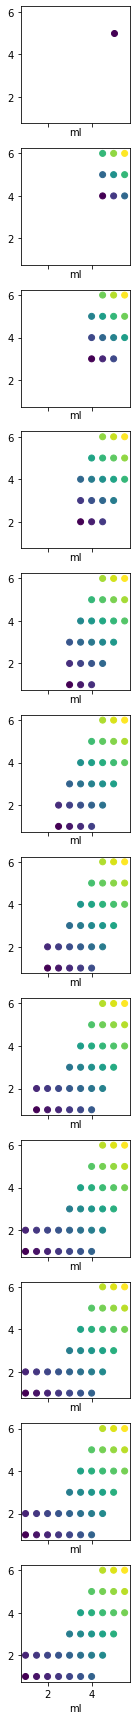

In [61]:
iterate_pargen_n_times_and_plot(n=12,
                                all_models=all_models,
                                g=g)

It doesn't know when to stop... i.e. the last 4 panels are identical, however the generator keeps generating.

We need to add a generic stopping_critera that if the last iteration didn't add any new models, then we can stop.

In [62]:
check_parameter_limits(all_models, parspace)

CORRECT: all mass >= mass_lo
CORRECT: all mass <= mass_hi
CORRECT: all ml >= ml_lo
CORRECT: all ml <= ml_hi
